<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# Clustering

## 1. Load data

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target_names.shape

(10,)

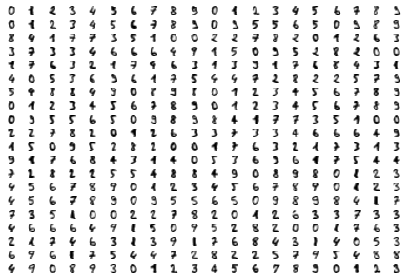

In [7]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [8]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(random_state=42)

In [9]:
embedding = reducer.transform(digits.data)

embedding

array([[14.601268  ,  2.9215922 ],
       [ 0.29476652, 11.487288  ],
       [ 2.7827795 ,  7.969271  ],
       ...,
       [-1.3782585 ,  9.421044  ],
       [-5.923414  ,  4.6751275 ],
       [-1.7677889 ,  9.0535555 ]], dtype=float32)

## 2. Clustering Methods

### 2.1 K-Means

https://scikit-learn.org/stable/modules/clustering.html#k-means

#### 2.1.1 Clustering raw data

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(digits.data)

kmeans

KMeans(n_clusters=10, random_state=42)

In [11]:
kmeans.predict(digits.data)

array([1, 2, 2, ..., 2, 4, 4], dtype=int32)

In [12]:
kmeans.cluster_centers_[0]

array([ 0.00000000e+00,  5.96590909e-01,  8.71590909e+00,  1.46306818e+01,
        1.40454545e+01,  7.00568182e+00,  5.45454545e-01, -5.55111512e-17,
        1.13636364e-02,  4.20454545e+00,  1.26022727e+01,  9.07386364e+00,
        1.12386364e+01,  1.19602273e+01,  1.84659091e+00,  1.13636364e-02,
        5.68181818e-03,  1.85795455e+00,  3.53977273e+00,  3.47159091e+00,
        1.17897727e+01,  9.92613636e+00,  8.57954545e-01, -1.38777878e-17,
       -4.33680869e-19,  3.97727273e-02,  9.09090909e-01,  8.30681818e+00,
        1.38295455e+01,  6.76704545e+00,  3.06818182e-01, -8.67361738e-19,
        0.00000000e+00,  6.25000000e-02,  6.81818182e-01,  4.60227273e+00,
        1.17613636e+01,  1.23125000e+01,  2.32954545e+00,  0.00000000e+00,
       -3.46944695e-18,  4.54545455e-01,  1.44318182e+00,  6.93181818e-01,
        4.17613636e+00,  1.23693182e+01,  6.36363636e+00,  5.68181818e-03,
        1.73472348e-18,  9.26136364e-01,  7.28409091e+00,  6.59090909e+00,
        8.59659091e+00,  

#### 2.1.2 Clustering UMAP embedding

In [69]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embedding)

kmeans

KMeans(n_clusters=10, random_state=42)

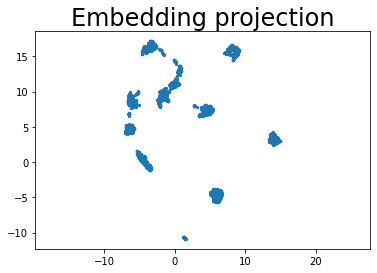

In [70]:
import numpy as np

plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Embedding projection', fontsize=24);

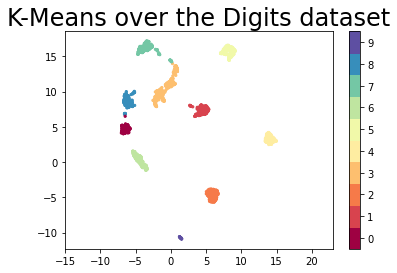

In [71]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters + 1) - 0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=24);

### 2.2 DBSCAN

https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [51]:
from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=1.5,
                  min_samples=25).fit(embedding)

dbscan_c

DBSCAN(eps=1.5, min_samples=25)

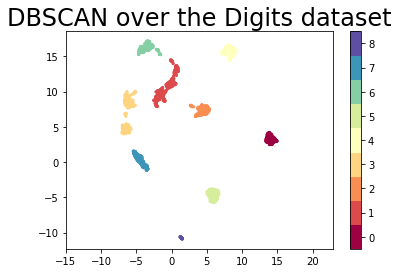

In [52]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

### 2.3 HDBSCAN

```
pip install hdbscan
```

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

In [53]:
import hdbscan

hdbscan_c = hdbscan.HDBSCAN(min_cluster_size=25)

hdbscan_c.fit(embedding)

hdbscan_c

HDBSCAN(min_cluster_size=25)

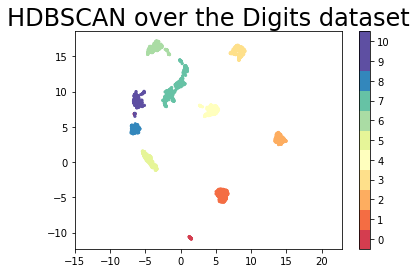

In [54]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(hdbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(hdbscan_c.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);

### 2.4 Which is the best method?

There is no definitive answer for this question. Each clustering algorithm could perform better or worse depending on the data and its hyperparameters.

In the digits dataset projection case, it seems that K-Means is the best choice as clustering algorithm. Nevertheless, the following actions are proposed:

- Fine tune hyperparameters of DBSCAN and HDBSCAN
- Repeat this analysis with the Moons dataset using these 3 algorithms


## 3. Evaluation metrics

### 3.1 Silhoutte score

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [72]:
from sklearn import metrics

print(f'K-Means: {metrics.silhouette_score(embedding, kmeans.labels_, metric="euclidean")}')
print(f'DBSCAN: {metrics.silhouette_score(embedding, dbscan_c.labels_, metric="euclidean")}')
print(f'HDBSCAN: {metrics.silhouette_score(embedding, hdbscan_c.labels_, metric="euclidean")}')

K-Means: 0.7684447169303894
DBSCAN: 0.7437300682067871
HDBSCAN: 0.7297289371490479


### 3.2 Adjusted Rand Score

https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score

In [73]:
print(f'K-Means: {metrics.adjusted_rand_score(digits.target, kmeans.labels_)}')
print(f'DBSCAN: {metrics.adjusted_rand_score(digits.target, dbscan_c.labels_)}')
print(f'HDBSCAN: {metrics.adjusted_rand_score(digits.target, hdbscan_c.labels_)}')

K-Means: 0.8469129425153614
DBSCAN: 0.7697006094921077
HDBSCAN: 0.8344651239806826


### 3.3 Elbow curve

```
pip install yellobrick
```

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

/home/ubuntu/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


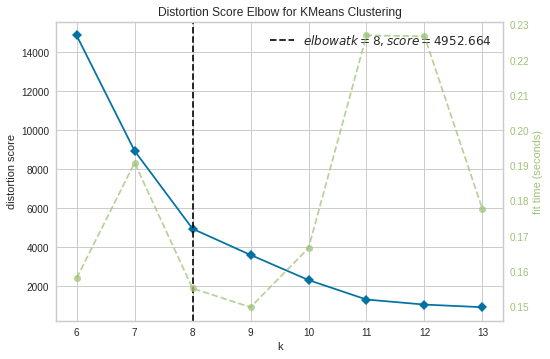

In [74]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(6,14))

visualizer.fit(embedding)
visualizer.show();

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>